##Perceptron

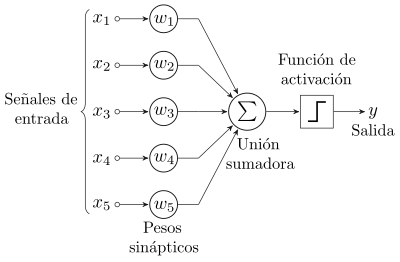



Un perceptrón es un tipo de neurona simple que toma una serie de entradas, las multiplica por pesos, y luego pasa la suma ponderada a través de una función de activación (en este caso, una función escalón). La función de activación decide si la salida del perceptrón es 1 o 0, basada en si la suma ponderada supera un umbral.


Vamos a usar los siguientes datos:

Entradas:
𝑥
1
=
0,
𝑥
2
=
1



Etiqueta esperada (target):
𝑡
=
1

Pesos iniciales:
𝑤
1
=
0.5
,
𝑤
2
=
−
0.5

Sesgo (bias):
𝑏
=
0

Tasa de aprendizaje (η): 0.1

##Salida Perceptron

Primero, calculemos la salida actual del perceptrón usando los pesos y el sesgo.

suma ponderada
=
(
𝑤
1
⋅
𝑥
1
)
+
(
𝑤
2
⋅
𝑥
2
)
+
𝑏


suma ponderada
=
(
0.5
⋅
0
)
+
(
−
0.5
⋅
1
)
+
0

suma ponderada
=
−
0.5


Luego, aplicamos la función de activación escalón. Dado que la suma ponderada
es menor que 0, la salida del perceptrón es 0.

##Calculo del error

El error se calcula como la diferencia entre la etiqueta esperada y la salida actual.

error
=
𝑡
−
salida
  

error
=
1
−
0

error
=
1




Para actualizar los pesos y el sesgo, usamos la regla de actualización del perceptrón:

𝑤
𝑖
=
𝑤
𝑖
+
𝜂
⋅
error
⋅
𝑥
𝑖

  
𝑏
=
𝑏
+
𝜂
⋅
error


Actualicemos cada peso:

Para
𝑤
1:


𝑤
1
=
0.5
+
0.1
⋅
1
⋅
0

𝑤
1
=
0.5

Para
𝑤
2
 :


𝑤
2
=
−
0.5
+
0.1
⋅
1
⋅
1

𝑤
2
=
−
0.4


Para el sesgo

𝑏
=
0
+
0.1
⋅
1

𝑏
=
0.1





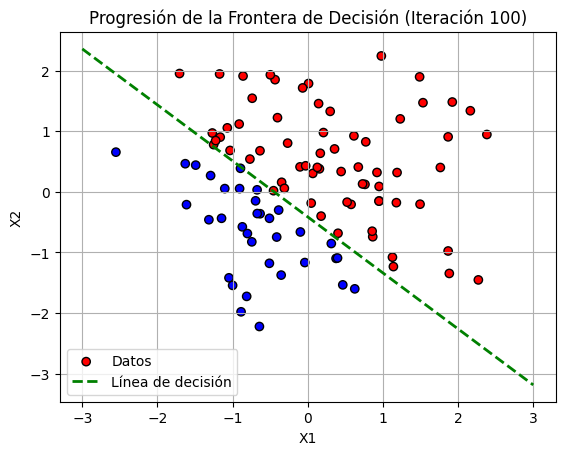

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.history = []

        for _ in range(self.n_iterations):
            for xi, target in zip(X, y):
                output = self.predict(xi)
                update = self.learning_rate * (target - output)
                self.weights += update * xi
                self.bias += update
            self.history.append((self.weights.copy(), self.bias))

    def predict(self, X):
        return np.where((np.dot(X, self.weights) + self.bias) >= 0, 1, -1)

# Generar datos de ejemplo linealmente separables
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.array([1 if xi[0] + xi[1] + 0.5 >= 0 else -1 for xi in X])

# Crear y entrenar el perceptrón
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X, y)

# Visualizar la progresión de la frontera de decisión
fig, ax = plt.subplots()

for i in range(len(perceptron.history)):
    clear_output(wait=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k', label='Datos')
    weights, bias = perceptron.history[i]
    x_values = np.linspace(-3, 3, 2)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, color='green', linestyle='--', linewidth=2, label='Línea de decisión')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Progresión de la Frontera de Decisión (Iteración {})'.format(i+1))
    plt.legend()
    plt.grid(True)
    plt.show()
    time.sleep(0.5)


## Ejercicio.

Programar un perceptrón con función de activación sigmoide y MSE como función de error

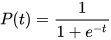





##Examen

¿Que es la función de activación?

¿Que pasa si todos los pesos de entrada al perceptron son 0?

¿La tasa de aprendizaje para que es util?

¿Porque decimos que la neurona 'aprende'?

¿Que es el error y para que nos sirve la función de error?


## Perceptron Multicapa

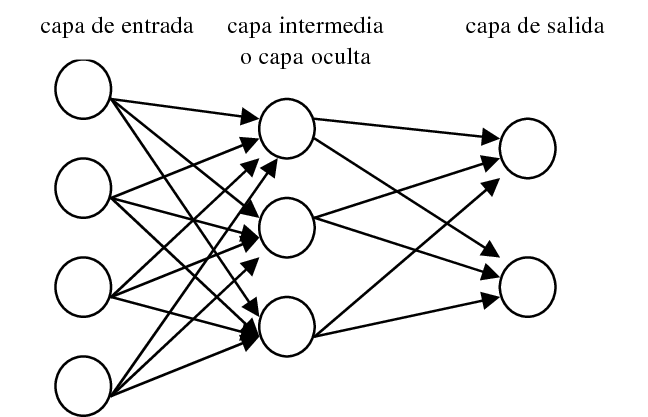

Un MLP es una red neuronal que consiste en al menos una capa oculta entre la capa de entrada y la capa de salida. Cada capa está completamente conectada, lo que significa que cada neurona de una capa está conectada a cada neurona de la siguiente capa.

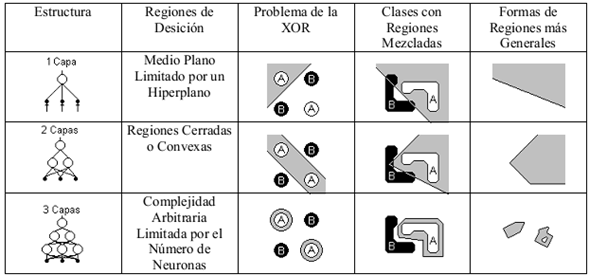




##Capas:

Capa de entrada: Recibe las características del conjunto de datos.
Capas ocultas: Son capas intermedias que transforman las entradas en algo que puede ser utilizado para realizar la clasificación o regresión. Puede haber una o más capas ocultas.
Capa de salida: Produce el resultado final de la red.

##Neurona

Cada neurona en el MLP aplica una función de activación a la combinación lineal de sus entradas. Esto introduce no linealidad en la red, permitiendo que el MLP resuelva problemas complejos.

##Propagación hacia adelante:

Los datos se pasan desde la capa de entrada, a través de las capas ocultas, hasta la capa de salida. En cada capa, se aplican pesos y funciones de activación.

##Retropropagación:

Es el proceso de ajuste de los pesos de la red neuronal. Se basa en la derivada de la función de pérdida con respecto a cada peso, actualizando los pesos para minimizar la pérdida.

Supongamos que tenemos un MLP con:

* Una capa de entrada con 2 neuronas.
* Una capa oculta con 3 neuronas.
* Una capa de salida con 1 neurona.

Cada neurona de una capa recibe una combinación lineal de las salidas de la capa anterior, seguida de la aplicación de una función de activación no lineal.


Si tenemos una entrada
𝑥
=
[
𝑥
1
,
𝑥
2
] y los pesos para la primera capa oculta son:

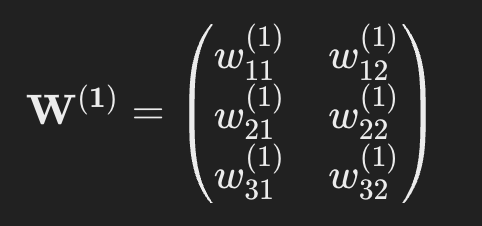



y los sesgos
𝑏
(
1
)
=
[
𝑏
1
(
1
)
,
𝑏
2
(
1
)
,
𝑏
3
(
1
)
]
, el cálculo de la salida de la capa oculta sería:

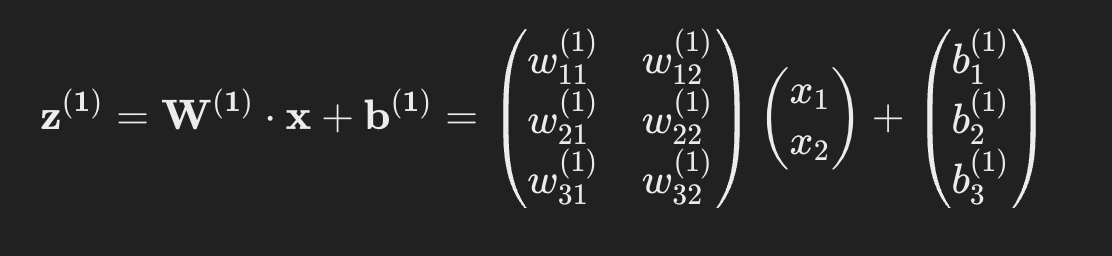

Luego, se aplica una función de activación (por ejemplo, una función sigmoid
𝜎):

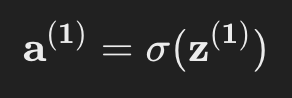

Las activaciones de la capa oculta se pasan a la capa de salida. Si los pesos de la capa de salida son
𝑊
(
2
)  y los sesgos son
𝑏
(
2
), el cálculo de la salida es:

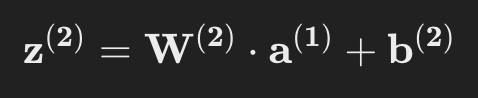

La función total que genera el MLP se puede ver como la composición de funciones:

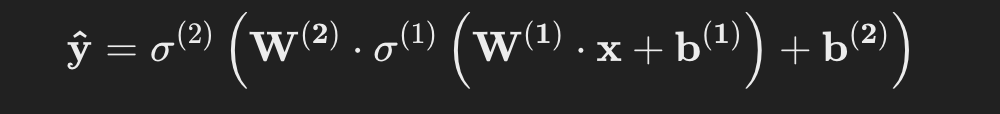



##¿Como podría saber que tanto influye W2 o W1 en la salida Y?